# Predicting Success on Youtube - Final Notebook

- First, we imported every tool we thought we would need for this project. Then we brought in the youtube data  we collected from the Kaggle website and studied it's makeup. 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import json
import datetime
from collections import Counter
# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.pipeline import Pipeline


# NLP
import re
import nltk
from nltk.corpus import stopwords

In [78]:
df = pd.read_csv('Data/USvideos.csv')

In [79]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [80]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [81]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Data Cleaning

- After visually analyzing the data, we discarded the columns we deemed overall useless to our model and then proceeded to clean the remaining columns to prepare them for the model. Columns that were dropped such as comment_disabled, ratings_disabled, thumbnail_link, and video_error_or_removed

In [83]:
def clean_trending_date(date):
    y,d,m = date.split('.')
    return datetime.date(int(y)+2000,int(m),int(d))
def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [84]:
trending_date = []
for date in list(range(0,len(df))):
    trending_date.append(clean_trending_date(df['trending_date'][date]))
df['trending_date'] = trending_date

In [85]:
publish_date = []
for date in list(range(0,len(df))):
    publish_date.append(clean_publish_time(df['publish_time'][date]))
df['publish_time'] = publish_date

In [86]:
df['trending_month'] = pd.DatetimeIndex(df['trending_date']).month

In [87]:
df['trending_year'] = pd.DatetimeIndex(df['trending_date']).year

In [88]:
df['trending_day'] = pd.DatetimeIndex(df['trending_date']).day

In [89]:
df['publish_month'] = pd.DatetimeIndex(df['publish_time']).month

In [90]:
df['publish_year'] = pd.DatetimeIndex(df['publish_time']).year

In [91]:
df['publish_day'] = pd.DatetimeIndex(df['publish_time']).day

In [92]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",11,2017,14,11,2017,13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,False,False,NaN,6,2018,14,5,2018,18
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,False,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,False,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17


In [93]:
views = list(df['views'].values)

In [94]:
Is_Successful = []
for view in list(range(0,len(df))):
    if views[view] > 180000:
            Is_Successful.append(True)
    else:
            Is_Successful.append(False)
    
df['Successful'] = Is_Successful

In [95]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,"One year after the presidential election, John...",11,2017,14,11,2017,13,True
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,False,NaN,6,2018,14,5,2018,18,True
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True


In [96]:
df['tag_list'] = df['tags'].astype('str').str.split('|')

In [97]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,tag_list
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True,[SHANtell martin]
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",11,2017,14,11,2017,13,True,"[last week tonight trump presidency, ""last wee..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""..."
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True,"[rhett and link, ""gmm"", ""good mythical morning..."
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,False,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""..."
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,False,NaN,6,2018,14,5,2018,18,True,[[none]]
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,False,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True,[I gave safiya nygaard a perfect hair makeover...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,False,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W..."


In [98]:
num_of_tags = []
for number in list(range(0,len(df))):
    num_of_tags.append(len(df['tag_list'][number]))

In [99]:
df['Number_of_Tags'] = num_of_tags

In [100]:
df['category_id'] = df['category_id'].astype(str)

In [101]:
categories = []
for category in df['category_id']:
    if category.__contains__('10'):
        categories.append('Music')
    elif category.__contains__('15'):
        categories.append('Pets & Animals')
    elif category.__contains__('17'):
        categories.append('Sport')
    elif category.__contains__('19'):
        categories.append('Travel & Events')
    elif category.__contains__('20'):
        categories.append('Gaming')
    elif category.__contains__('22'):
        categories.append('People & Blogs')
    elif category.__contains__('23'):
        categories.append('Comedy')
    elif category.__contains__('24'):
        categories.append('Entertainment')
    elif category.__contains__('25'):
        categories.append('News & Politics')
    elif category.__contains__('26'):
        categories.append('How-to & Style')
    elif category.__contains__('27'):
        categories.append('Education')
    elif category.__contains__('28'):
        categories.append('Science & Technology')
    elif category.__contains__('29'):
        categories.append('Non-profits & Activism')
    elif category.__contains__('43'):
        categories.append('Shows')
    elif category.__contains__('1'):
        categories.append('Film & Animation')
    elif category.__contains__('2'):
        categories.append('Cars & Vehicles')

df['Genre'] = categories

In [102]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,tag_list,Number_of_Tags,Genre
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,11,2017,14,11,2017,13,True,[SHANtell martin],1,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,11,2017,14,11,2017,13,True,"[last week tonight trump presidency, ""last wee...",4,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,11,2017,14,11,2017,12,True,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,11,2017,14,11,2017,13,True,"[rhett and link, ""gmm"", ""good mythical morning...",27,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,11,2017,14,11,2017,12,True,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,6,2018,14,5,2018,18,True,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",14,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,6,2018,14,5,2018,18,True,[[none]],1,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,6,2018,14,5,2018,18,True,[I gave safiya nygaard a perfect hair makeover...,24,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,6,2018,14,5,2018,17,True,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",22,Film & Animation


In [103]:
df['description'] = df['description'].astype('str').str.split(' ')

In [104]:
num_of_words = []
for num in list(range(0,len(df))):
    num_of_words.append(len(df['description'][num]))

In [105]:
df['description_length'] = num_of_words

In [106]:
df['tag_list'] = df['tag_list'].astype(str)

In [107]:
df['Genre'] = df['Genre'].astype(str)

In [108]:
def top_words_of_tags(category, figure_name, k=5):
    nlp_33 = df[df['Genre'] == category]
    cnt_c2 = Counter()
    for title in nlp_33['tag_list']:
        for token in title.split():
            cnt_c2[token] += 1
    dist_c2 = cnt_c2.most_common(k)
    top_words_c2 = []
    freqs_c2 = []
    for word, freq in dist_c2:
        top_words_c2.append(word)
        freqs_c2.append(freq)
    fig= plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    plt.bar(top_words_c2, freqs_c2, color='skyblue')
    plt.title(figure_name, fontsize=20)
    plt.xlabel('Keyword', fontsize=17)
    plt.ylabel('Video Tags', fontsize=17)

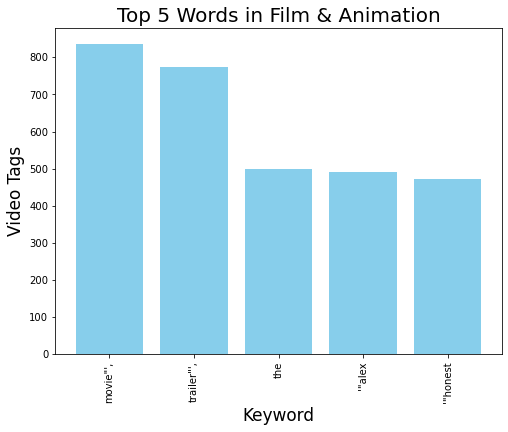

In [109]:
top_words_of_tags('Film & Animation', 'Top 5 Words in Film & Animation')

In [110]:
df = df.loc[(df['views'] > 1000) & (df['likes'] > 100 )]

In [111]:
df = df.drop(columns='views')

In [112]:
df= df.drop(columns="description")

In [113]:
df = df.drop(columns="category_id")

In [114]:
df = df.drop(columns='tag_list')

In [115]:
df = df.drop(columns='tags')

In [116]:
df = df.drop(columns='publish_time')

In [117]:
df = df.drop(columns='trending_date')

In [118]:
df = df.drop(columns="video_error_or_removed")

In [119]:
df = df.drop(columns="thumbnail_link")

In [120]:
df = df.drop(columns='ratings_disabled')

In [121]:
df = df.drop(columns="channel_title")

In [122]:
df = df.drop(columns="title")

In [123]:
df = df.drop(columns='comments_disabled')

In [124]:
df = df.drop(columns="video_id")

In [125]:
X = df.drop(columns='Successful')
y = df['Successful']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)

In [127]:
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, random_state=42, test_size=.20)

In [128]:
#Modeless Baseline
pd.Series(y_train).value_counts(normalize=True)

True     0.818091
False    0.181909
Name: Successful, dtype: float64

In [129]:
X_train

,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Number_of_Tags,Genre,description_length
28642,13920,275,2074,4,2018,14,4,2018,7,22,Education,114
40092,162098,3566,15357,6,2018,10,5,2018,23,13,Comedy,63
3391,3250,926,1297,11,2017,30,11,2017,22,4,Music,15
13974,30014,769,2654,1,2018,24,1,2018,17,27,How-to & Style,159
39995,221056,15832,44801,6,2018,10,6,2018,5,1,Film & Animation,93
...,...,...,...,...,...,...,...,...,...,...,...,...
6632,60106,618,5304,12,2017,17,12,2017,15,7,Music,46
11960,139665,65698,26132,1,2018,14,1,2018,8,22,Entertainment,109
39251,35357,1841,3308,6,2018,6,5,2018,25,25,Entertainment,269
922,1899,74,82,11,2017,18,11,2017,15,4,Music,29


In [130]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

num_columns = [
    'likes',
    'dislikes',
    'comment_count',
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]

used_cols = [*cat_columns, *num_columns]
used_cols

['Genre',
 'likes',
 'dislikes',
 'comment_count',
 'Number_of_Tags',
 'description_length',
 'trending_month',
 'trending_year',
 'trending_day',
 'publish_month',
 'publish_year',
 'publish_day']

In [131]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [132]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(X_train[used_cols])
    test_preds = model.predict(X_test[used_cols])

    train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
    test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]

    plot_confusion_matrix(model, Xte, yte)
    plot_roc_curve(model, X_test[used_cols], y_test);
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

<AxesSubplot:>

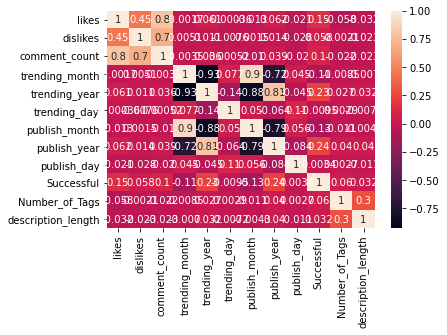

In [133]:
sns.heatmap(df.corr(), annot=True)

# All Elements

## Decision Tree

Train F1: 0.9512
Train Precision: 0.9417
Train ROC-AUC: 0.8466
********************
Test F1: 0.9517
Test Precision: 0.9417
Test ROC-AUC: 0.8411


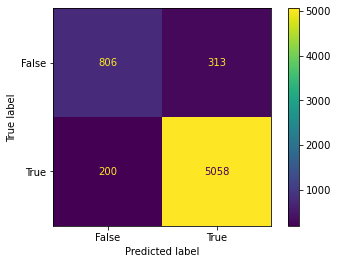

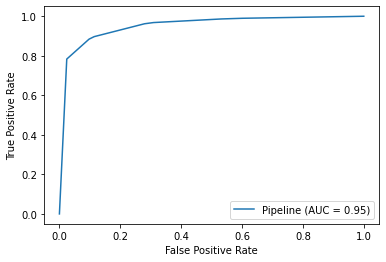

In [134]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}

gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)


## Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

Train F1: 0.9470
Train Precision: 0.9225
Train ROC-AUC: 0.8025
********************
Test F1: 0.9501
Test Precision: 0.9265
Test ROC-AUC: 0.8057


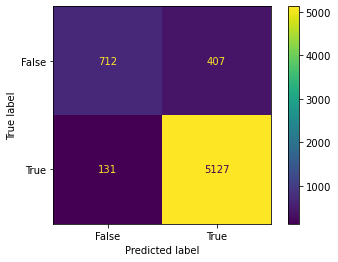

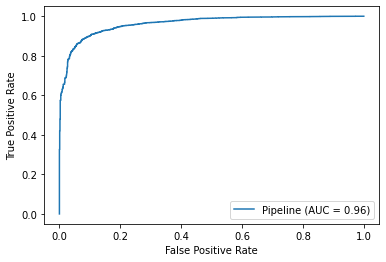

In [136]:
clf_rf = Pipeline(steps = [
('preprocessor', preprocessor),
('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)
    

## Logistic Regression

Train F1: 0.9494
Train Precision: 0.9467
Train ROC-AUC: 0.8555
********************
Test F1: 0.9537
Test Precision: 0.9541
Test ROC-AUC: 0.8689


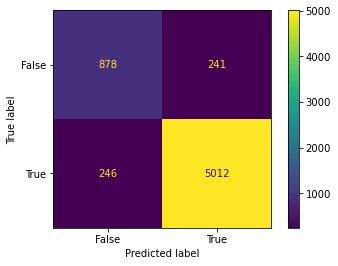

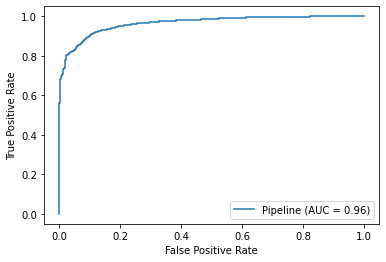

In [137]:
clf_lr = Pipeline(steps=[
('preprocessor', preprocessor),
('logreg', LogisticRegression(random_state=42, max_iter=300))])

clf_lr.fit(X_train[used_cols], y_train)

evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)
    

## Naive Bayes

Train F1: 0.8246
Train Precision: 0.9876
Train ROC-AUC: 0.8339
********************
Test F1: 0.8277
Test Precision: 0.9905
Test ROC-AUC: 0.8394


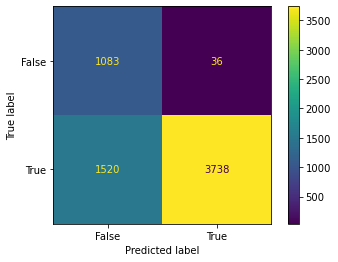

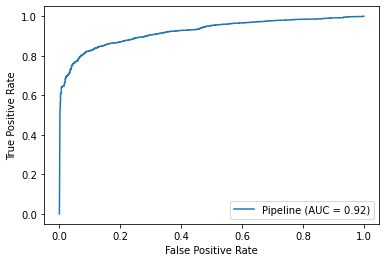

In [138]:
clf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])
clf_nb.fit(X_train[used_cols], y_train)

evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

# Just the Film & Animation Genre

In [139]:
df_Film = df.loc[df['Genre']== 'Film & Animation']
df_Film

,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
8,3543,119,340,11,2017,14,11,2017,13,True,28,Film & Animation,148
29,715,238,246,11,2017,14,5,2011,29,False,8,Film & Animation,12
36,7515,792,2111,11,2017,14,11,2017,12,True,28,Film & Animation,54
71,2233,187,255,11,2017,14,11,2017,11,False,12,Film & Animation,200
86,16430,945,1231,11,2017,14,11,2017,9,True,13,Film & Animation,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40868,2650,66,567,6,2018,14,5,2018,31,True,17,Film & Animation,215
40886,58740,1292,6149,6,2018,14,5,2018,29,True,14,Film & Animation,92
40893,40613,1010,1805,6,2018,14,5,2018,27,True,45,Film & Animation,265
40937,266267,4237,14617,6,2018,14,5,2018,19,True,4,Film & Animation,10


In [140]:
df_Film.describe()

,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Number_of_Tags,description_length
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,72996.990325,2671.368514,7865.639402,5.175901,2017.782322,15.816183,5.225594,2017.726473,16.157432,18.854002,125.740985
std,119373.085432,4015.286626,11928.374183,3.738578,0.412758,8.723175,3.840603,0.579708,8.375525,11.732866,83.813660
min,107.000000,2.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,1.000000
25%,5324.500000,209.250000,618.000000,2.000000,2018.000000,8.000000,2.000000,2018.000000,9.000000,10.000000,66.000000
50%,26738.500000,1095.500000,2880.500000,4.000000,2018.000000,16.000000,4.000000,2018.000000,16.000000,18.000000,113.000000
75%,75700.000000,3367.750000,9494.500000,6.000000,2018.000000,23.000000,6.000000,2018.000000,23.000000,26.000000,164.000000
max,922355.000000,38082.000000,108849.000000,12.000000,2018.000000,31.000000,12.000000,2018.000000,31.000000,58.000000,629.000000


In [141]:
df_Film['Number_of_Tags'].mean()

18.854001759014952

In [142]:
df_Film['description_length'].mean()

125.7409850483729

In [143]:
df_Film.corr()

,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,description_length
likes,1.000000,0.585804,0.774737,-0.080177,0.184198,-0.010090,-0.113069,0.176069,-0.044957,0.268907,-0.080294,0.090819
dislikes,0.585804,1.000000,0.616289,-0.097335,0.171828,-0.001148,-0.106531,0.161248,-0.091477,0.283920,-0.004211,0.132566
comment_count,0.774737,0.616289,1.000000,-0.120613,0.194938,-0.022324,-0.145858,0.183395,0.003672,0.285028,-0.055423,0.169674
trending_month,-0.080177,-0.097335,-0.120613,1.000000,-0.918004,0.136205,0.875328,-0.660665,0.074480,-0.175301,-0.147483,-0.043976
trending_year,0.184198,0.171828,0.194938,-0.918004,1.000000,-0.205764,-0.856541,0.762307,-0.081583,0.290570,0.181484,0.083257
trending_day,-0.010090,-0.001148,-0.022324,0.136205,-0.205764,1.000000,0.076510,-0.097034,0.034894,0.035563,0.024033,-0.000912
publish_month,-0.113069,-0.106531,-0.145858,0.875328,-0.856541,0.076510,1.000000,-0.708342,0.100283,-0.220594,-0.168818,-0.075496
publish_year,0.176069,0.161248,0.183395,-0.660665,0.762307,-0.097034,-0.708342,1.000000,-0.149515,0.323844,0.155445,0.114569
publish_day,-0.044957,-0.091477,0.003672,0.074480,-0.081583,0.034894,0.100283,-0.149515,1.000000,-0.036944,0.017515,0.071123
Successful,0.268907,0.283920,0.285028,-0.175301,0.290570,0.035563,-0.220594,0.323844,-0.036944,1.000000,0.175646,0.064989


<AxesSubplot:>

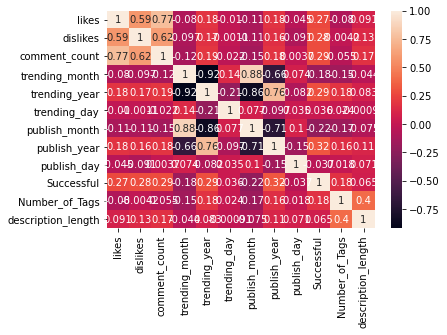

In [144]:
sns.heatmap(df_Film.corr(), annot=True)


In [145]:
X = df_Film.drop(columns='Successful')
y = df_Film['Successful']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [147]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

['Genre']

In [148]:
num_columns = [
    'likes',
    'dislikes',
    'comment_count',
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]

In [149]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [150]:
pd.Series(y_train).value_counts(normalize=True)

True     0.826001
False    0.173999
Name: Successful, dtype: float64

## Decision Tree

Train F1: 0.9678
Train Precision: 0.9789
Train ROC-AUC: 0.9295
********************
Test F1: 0.9612
Test Precision: 0.9706
Test ROC-AUC: 0.9046


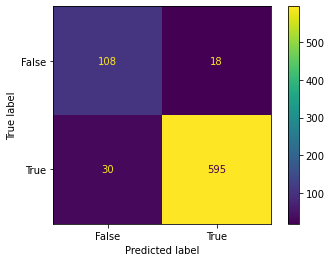

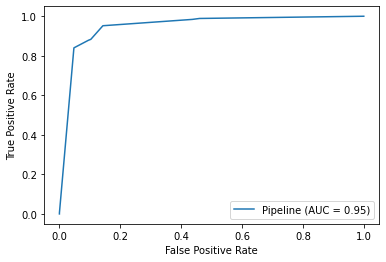

In [151]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
    "tree__max_depth": [3, 4, 5],
    "tree__min_samples_leaf": [1, 2, 10],
    }
gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

# Only looking at what we can control

In [152]:
df = df.drop(columns="likes")

In [153]:
df = df.drop(columns="dislikes")

In [154]:
df = df.drop(columns="comment_count")

In [155]:
df

,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
0,11,2017,14,11,2017,13,True,1,People & Blogs,136
1,11,2017,14,11,2017,13,True,4,Entertainment,80
2,11,2017,14,11,2017,12,True,23,Comedy,74
3,11,2017,14,11,2017,13,True,27,Entertainment,123
4,11,2017,14,11,2017,12,True,14,Entertainment,53
...,...,...,...,...,...,...,...,...,...,...
40944,6,2018,14,5,2018,18,True,14,Pets & Animals,9
40945,6,2018,14,5,2018,18,True,1,People & Blogs,1
40946,6,2018,14,5,2018,18,True,24,Entertainment,67
40947,6,2018,14,5,2018,17,True,22,Film & Animation,242


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [157]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
num_columns = [
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]
used_cols = [*cat_columns, *num_columns]
used_cols

cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [158]:
pd.Series(y_train).value_counts(normalize=True)

True     0.825806
False    0.174194
Name: Successful, dtype: float64

Train F1: 0.9144
Train Precision: 0.8548
Train ROC-AUC: 0.5959
********************
Test F1: 0.9179
Test Precision: 0.8657
Test ROC-AUC: 0.6054


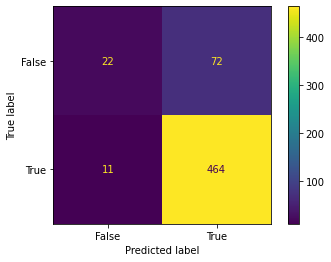

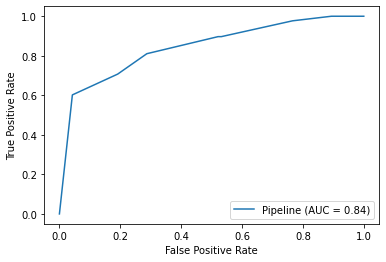

In [159]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}
    
gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

Train F1: 0.9161
Train Precision: 0.8451
Train ROC-AUC: 0.5657
********************
Test F1: 0.9193
Test Precision: 0.8538
Test ROC-AUC: 0.5670


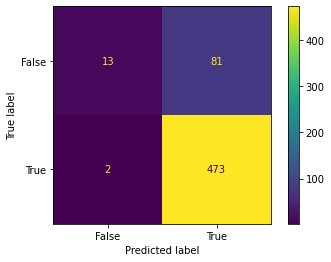

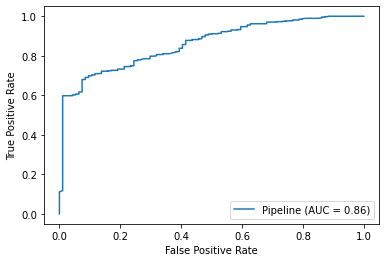

In [160]:
clf_rf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))
])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [161]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, max_iter=200))
])

clf_lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Genre']),
                                                 ('nums', StandardScaler(),
                                                  ['Number_of_Tags',
                                                   'description_length',
                                                   'trending_month',
                                                   'trending_year',
                                                   'trending_day',
                                                   'publish_month',
                                                   'publish_year',
                                                   'publish_day'])])),
                ('logreg', LogisticRegression(max_iter=200, ra

Train F1: 0.9089
Train Precision: 0.8490
Train ROC-AUC: 0.5765
********************
Test F1: 0.9121
Test Precision: 0.8587
Test ROC-AUC: 0.5821


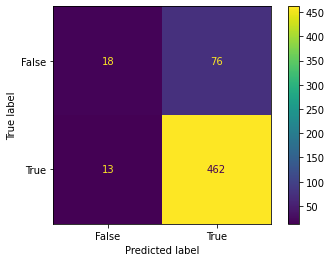

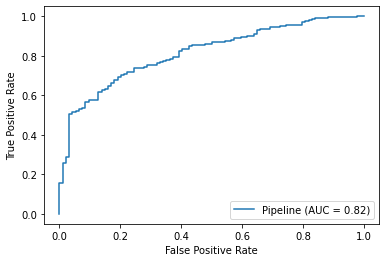

In [162]:
evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

Train F1: 0.8602
Train Precision: 0.8924
Train ROC-AUC: 0.6778
********************
Test F1: 0.8520
Test Precision: 0.9113
Test ROC-AUC: 0.7032


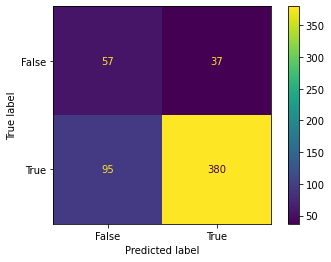

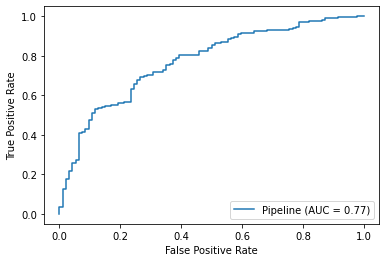

In [163]:
clf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])
clf_nb.fit(X_train[used_cols], y_train)

evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)